In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles # need pip install matplotlib_venn
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as goq
import math
import os
import missingno as msno
from bs4 import BeautifulSoup
import requests

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('output/WorldBank_Climate_Data.csv')
df

,Country Name,Year,Country Code,Urban population (% of total population),Urban population,Urban population growth (annual %),"Population, total",Population growth (annual %),"Mortality rate, under-5 (per 1,000 live births)","School enrollment, primary and secondary (gross), gender parity index (GPI)",...,Electricity production from hydroelectric sources (% of total),Electricity production from coal sources (% of total),"Foreign direct investment, net inflows (% of GDP)",Cereal yield (kg per hectare),Forest area (% of land area),Forest area (sq. km),Arable land (% of land area),Agricultural land (% of land area),Agricultural land (sq. km),Temperature
0,Aruba,1980,ABW,50.472,30332.0,0.178188,60097.0,0.208214,0.000000,1.801101,...,0.000000,79.440362,724.505825,21575.662731,0.000000,115769.369567,11.111111,11.111111,20.000000,28.23
1,Aruba,1981,ABW,50.456,30557.0,0.739053,60561.0,0.769120,0.000000,1.740488,...,0.000000,74.827728,682.280735,20462.763416,0.000000,107664.729574,11.111111,11.111111,20.000000,27.99
2,Aruba,1982,ABW,50.441,30941.0,1.248837,61341.0,1.279734,0.000000,1.818376,...,0.000000,83.801181,751.460978,22349.706956,0.000000,120115.571298,11.111111,11.111111,20.000000,27.87
3,Aruba,1983,ABW,50.426,31372.0,1.383361,62213.0,1.411552,0.000000,1.355550,...,0.000000,38.116389,377.294190,12291.191029,3.492567,49620.650800,11.111111,11.111111,20.000000,28.53
4,Aruba,1984,ABW,50.411,31671.0,0.948566,62826.0,0.980502,0.000000,2.067056,...,0.000000,107.243406,945.743061,27612.911827,0.000000,154206.855753,11.111111,11.111111,20.000000,27.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,Zimbabwe,2016,ZWE,32.296,4531238.0,1.274094,14030338.0,1.549294,59.500000,0.967408,...,30.184419,56.526745,1.669274,435.100000,45.570273,176288.600000,10.339925,41.876696,162000.000000,22.19
8360,Zimbabwe,2017,ZWE,32.237,4589452.0,1.276544,14236599.0,1.459406,58.200000,0.977384,...,33.977124,17.710697,1.299939,622.000000,45.451183,175827.900000,10.339925,41.876696,162000.000000,21.65
8361,Zimbabwe,2018,ZWE,32.209,4650597.0,1.323497,14438812.0,1.410382,55.900000,0.987236,...,27.728171,20.479793,3.814032,579.100000,45.332093,175367.200000,10.339925,41.876696,162000.000000,22.03
8362,Zimbabwe,2019,ZWE,32.210,4717307.0,1.424249,14645473.0,1.421142,54.600000,0.956716,...,52.005092,5.683258,1.653631,2627.071857,45.213002,174906.500000,13.469086,35.351614,247559.498555,22.30


In [3]:
df[df['Country Name'] == 'Canada'].Temperature.mean()

-4.367804878048782

In [4]:
col = "Total greenhouse gas emissions (kt of CO2 equivalent)"
df_corr = df.corr(method="pearson", min_periods=100)
df_corr.loc[:, [col]].sort_values(by=col)

,Total greenhouse gas emissions (kt of CO2 equivalent)
CO2 emissions from liquid fuel consumption (% of total),-0.227952
Temperature,-0.198925
Electricity production from hydroelectric sources (% of total),-0.134282
Electricity production from oil sources (% of total),-0.123753
"Mortality rate, under-5 (per 1,000 live births)",-0.099903
"Agriculture, forestry, and fishing, value added (% of GDP)",-0.097612
Population growth (annual %),-0.089961
"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",-0.063345
Urban population growth (annual %),-0.048286
"Electricity production from renewable sources, excluding hydroelectric (% of total)",-0.031366


In [5]:
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5).index

Index(['CO2 emissions from solid fuel consumption (% of total)',
       'Electricity production from coal sources (% of total)',
       'CO2 emissions (kg per 2015 US$ of GDP)',
       'Urban population (% of total population)',
       'CO2 emissions from gaseous fuel consumption (kt)'],
      dtype='object')

In [6]:
df_corr = df.corr(method="kendall")
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5)

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.399229
CO2 emissions from solid fuel consumption (kt),-0.333534
CO2 emissions (kt),-0.291999
Electricity production from coal sources (% of total),-0.273788
CO2 emissions from gaseous fuel consumption (kt),-0.255753


In [7]:
df_corr = df.corr(method="spearman")
df_corr.loc[:, ['Temperature']].sort_values(by="Temperature").head(5)

,Temperature
CO2 emissions from solid fuel consumption (% of total),-0.561173
CO2 emissions from solid fuel consumption (kt),-0.450135
CO2 emissions (kt),-0.428360
Electricity production from coal sources (% of total),-0.391902
CO2 emissions from liquid fuel consumption (kt),-0.365935


In [18]:
for col in df.columns.tolist():
    print(col)

Country Name
Year
Country Code
Urban population (% of total population)
Urban population
Urban population growth (annual %)
Population, total
Population growth (annual %)
Mortality rate, under-5 (per 1,000 live births)
School enrollment, primary and secondary (gross), gender parity index (GPI)
Agriculture, forestry, and fishing, value added (% of GDP)
Population in urban agglomerations of more than 1 million (% of total population)
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)
Methane emissions (kt of CO2 equivalent)
Total greenhouse gas emissions (kt of CO2 equivalent)
Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
CO2 emissions from solid fuel consumption (% of total)
CO2 emissions from solid fuel consumption (kt)
CO2 emissions (metric tons per capita)
CO2 emissions from liquid fuel consumption (% of total)
CO2 emissions from liquid fuel consumption (kt)
CO2 emissions (kt)
CO2 emissions (kg per 2015 US$ of GDP)
CO2 emissio

Text(0.5, 1.0, 'The world')

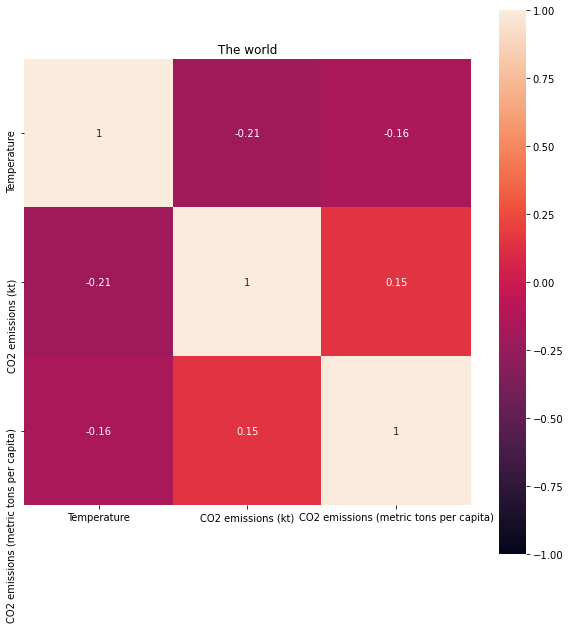

In [20]:
small_corr = df[['Temperature', 'CO2 emissions (kt)', 'CO2 emissions (metric tons per capita)']].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(small_corr,square=True, annot=True, vmax=1, vmin=-1)
plt.title('The world')

Text(0.5, 1.0, 'The world')

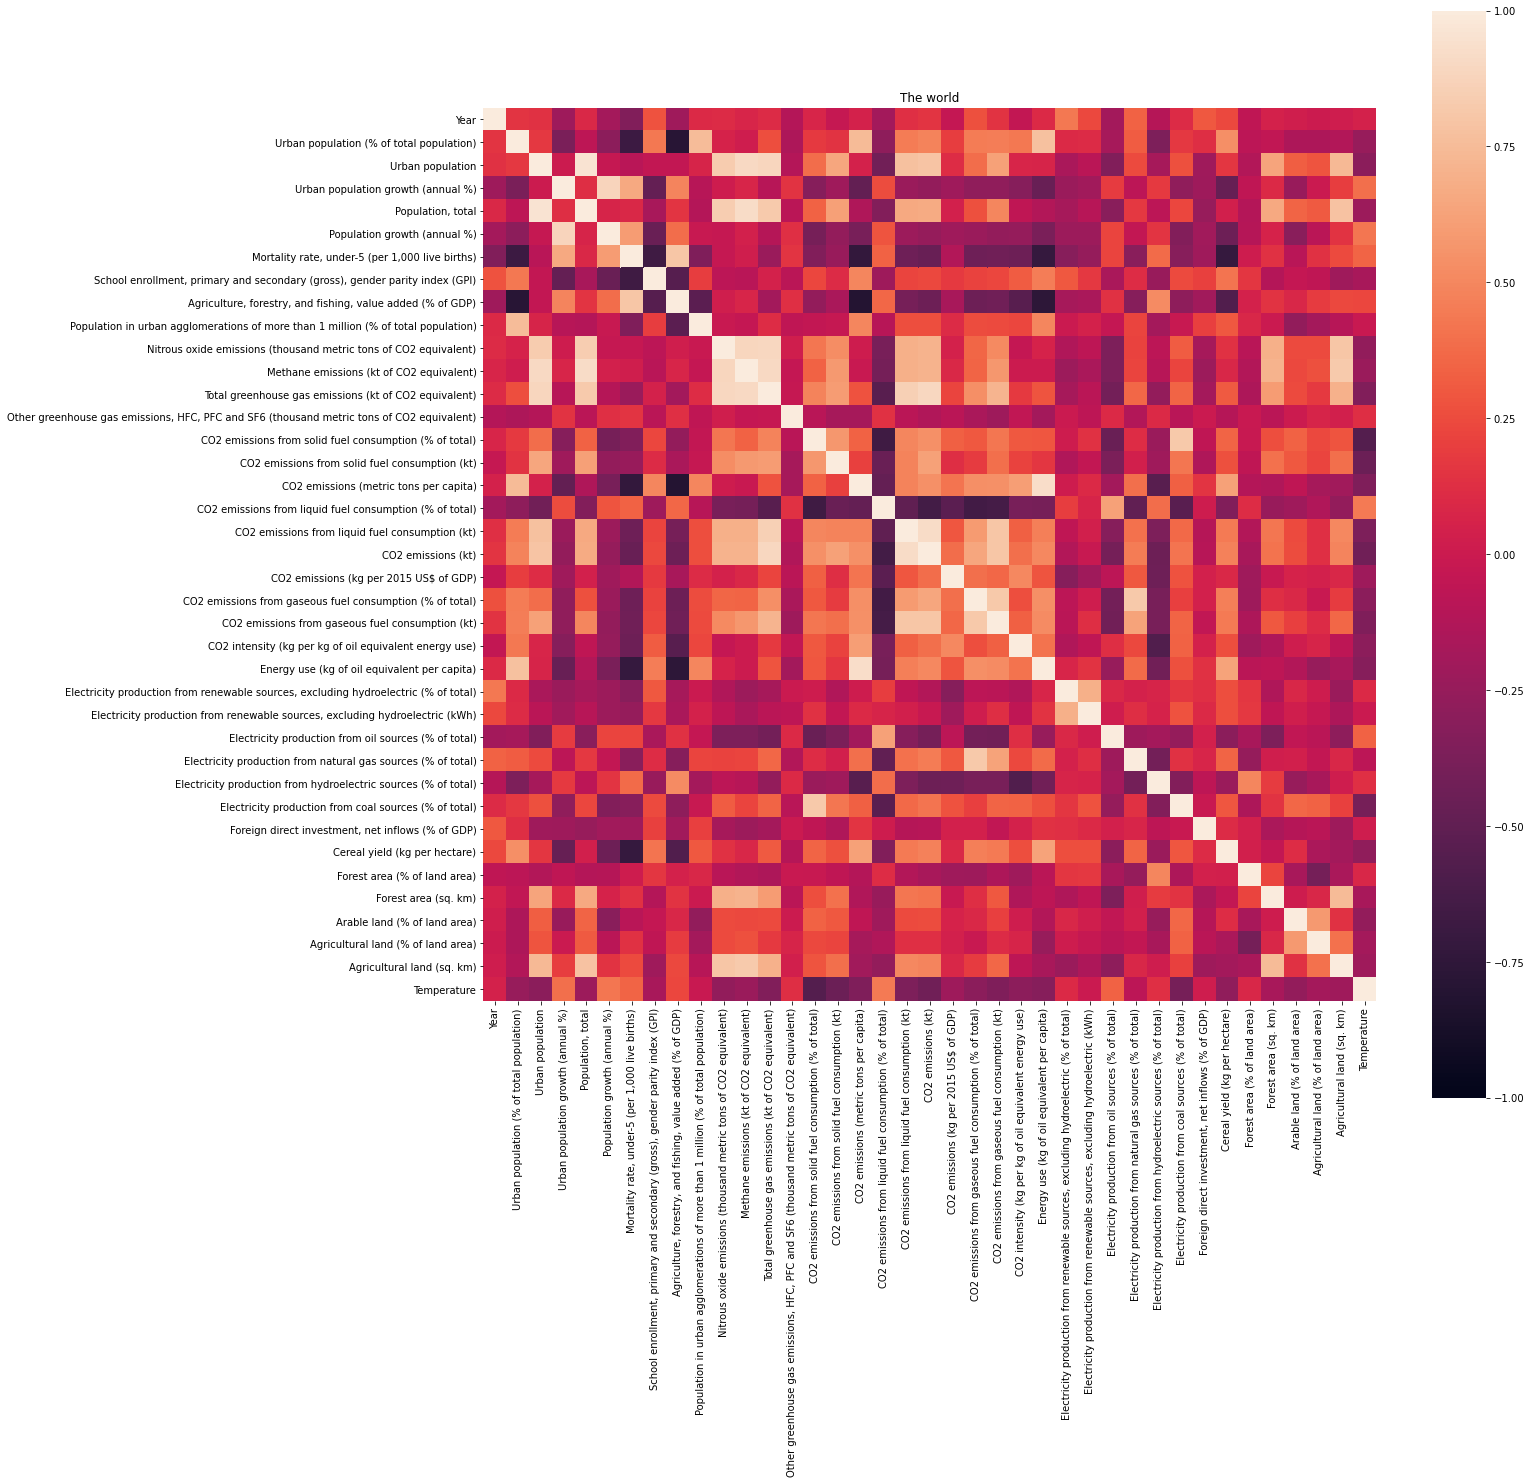

In [21]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_corr,square=True,vmax=1, vmin=-1)
plt.title('The world')